In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data
mnist = keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()
#print the shapes of train and test set
def print_shapes_of_data(X_train=None,y_train=None,X_test=None,y_test=None):
    
    print("The input training set has shape of :",X_train.shape)
    print("The input feature test set has shape of :",X_test.shape)
    print("The output training set has shape of :",y_train.shape)
    print("The output test set has shape of :",y_test.shape)


In [3]:
print_shapes_of_data(X_train,y_train,X_test,y_test)

The input training set has shape of : (60000, 28, 28)
The input feature test set has shape of : (10000, 28, 28)
The output training set has shape of : (60000,)
The output test set has shape of : (10000,)


In [4]:
#changing all to float
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [5]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [6]:
import urllib.request as request

In [7]:
import os
from pathlib import Path

In [14]:
#CNN model 
model = keras.models.Sequential([
    keras.layers.Conv2D(64,7,activation='relu',padding="same",input_shape=[28,28,1]),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(128,3,activation='relu',padding="same"),
    keras.layers.Conv2D(128,3,activation='relu',padding="same"),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])


In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         2

In [20]:
history = model.fit(X_train,y_train,batch_size=50,validation_split=0.2,epochs=10)

Epoch 1/10
960/960 [==============================] - 25s 18ms/step - loss: 0.8946 - accuracy: 0.6914 - val_loss: 0.0928 - val_accuracy: 0.9784
Epoch 2/10
960/960 [==============================] - 17s 18ms/step - loss: 0.2589 - accuracy: 0.9291 - val_loss: 0.0863 - val_accuracy: 0.9799
Epoch 3/10
960/960 [==============================] - 17s 18ms/step - loss: 0.1668 - accuracy: 0.9579 - val_loss: 0.0677 - val_accuracy: 0.9838
Epoch 4/10
960/960 [==============================] - 17s 18ms/step - loss: 0.1292 - accuracy: 0.9701 - val_loss: 0.0520 - val_accuracy: 0.9880
Epoch 5/10
960/960 [==============================] - 17s 18ms/step - loss: 0.1110 - accuracy: 0.9733 - val_loss: 0.0706 - val_accuracy: 0.9833
Epoch 6/10
960/960 [==============================] - 17s 18ms/step - loss: 0.1036 - accuracy: 0.9760 - val_loss: 0.0538 - val_accuracy: 0.9881
Epoch 7/10
960/960 [==============================] - 17s 18ms/step - loss: 0.0900 - accuracy: 0.9782 - val_loss: 0.0563 - val_accuracy:

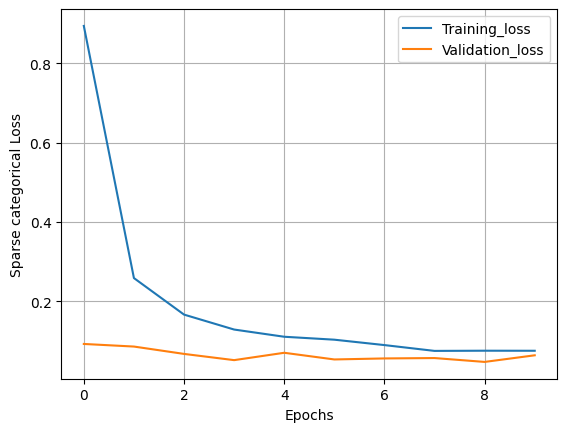

In [21]:
plt.plot(history.epoch,history.history['loss'],label="Training_loss")
plt.plot(history.epoch,history.history['val_loss'],label="Validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Sparse categorical Loss")
plt.legend()
plt.grid("both")
plt.show()

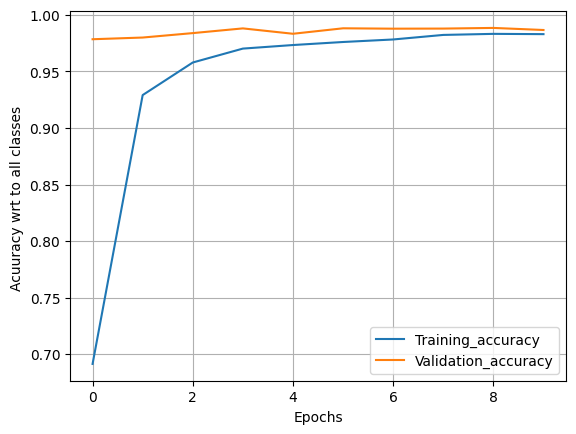

In [22]:
plt.plot(history.epoch,history.history['accuracy'],label="Training_accuracy")
plt.plot(history.epoch,history.history['val_accuracy'],label="Validation_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acuuracy wrt to all classes ")
plt.legend()
plt.grid("both")
plt.show()

In [23]:
y_predict = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [25]:
# for each test data the model is predicting 10 outputs , as we have choosen 10 layers at the last layers with softmax activation
y_predict.shape

(10000, 10)

In [26]:
y_predict_ac = np.argmax(y_predict,axis=1)

In [28]:
y_predict_ac.shape

(10000,)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
cm = classification_report(y_test.reshape(-1,1),y_predict_ac)
print(cm)

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       980
         1.0       1.00      0.99      0.99      1135
         2.0       0.99      1.00      0.99      1032
         3.0       1.00      0.99      0.99      1010
         4.0       1.00      0.97      0.98       982
         5.0       0.99      0.99      0.99       892
         6.0       0.99      0.98      0.99       958
         7.0       0.99      0.98      0.99      1028
         8.0       0.98      1.00      0.99       974
         9.0       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



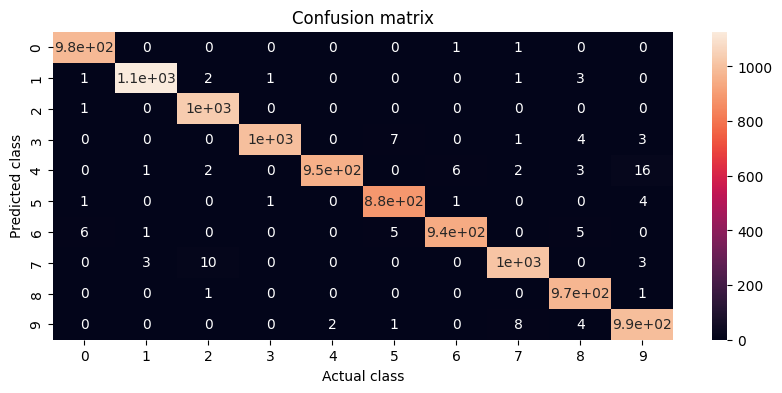

In [38]:
sm = confusion_matrix(y_test,y_predict_ac)
plt.figure(figsize=(10,4))
plt.title("Confusion matrix")
sns.heatmap(sm,annot=True)

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.show()